In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from ae import EncoderDecoderNetwork

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../../Datasets/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../../Datasets/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../../Datasets/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../../Datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../../Datasets/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# Hyper-Parameters
TRAINING_EPOCHS = 100  # 5000
LEARNING_RATE = 0.001
CODE_VECTOR = 128
HIDDEN_LAYER_UNITS = [256]
ACTIVATION_FUNCTION = tf.nn.elu  # tf.nn.selu
RUNS = 10
num_of_features = 28 * 28

In [4]:
edn = EncoderDecoderNetwork(input_channels=num_of_features,
                            output_channels=num_of_features,
                            hidden_layer_sizes=HIDDEN_LAYER_UNITS,
                            n_dims_code=CODE_VECTOR,
                            learning_rate=LEARNING_RATE,
                            activation_fn=ACTIVATION_FUNCTION)

In [5]:
train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

print("train_data: ", train_data.shape)
print("train_labels: ", train_labels.shape)
print("test_data: ", test_data.shape)
print("test_labels: ", test_labels.shape)

train_data:  (55000, 784)
train_labels:  (55000, 10)
test_data:  (10000, 784)
test_labels:  (10000, 10)


In [6]:
no_of_examples = 5000
index = np.random.randint(low=0, high=55000, size=no_of_examples)

In [7]:
cost_log = edn.train_session(train_data[0:5000, :], train_data[0:5000, :], None)  

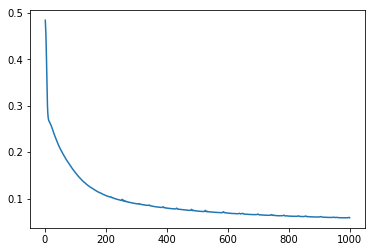

In [8]:
plt.plot(range(1, len(cost_log)+1), cost_log)
plt.show()

Original Images


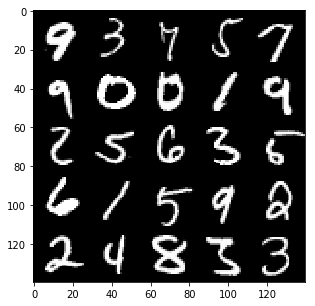

Reconstructed Images


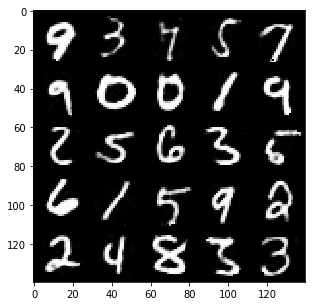

In [9]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 5
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = edn.generate(batch_x)
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()